In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
policy_file_path = "C:/Users/SAPTARSHI/Downloads/policy factors.xlsx"
df_policy = pd.read_excel(policy_file_path)

In [3]:
# Define independent variables (X) and target variable (y)
X_policy = df_policy.drop(columns=["Have you ever crossed the street during a red light?"])
y_policy = df_policy["Have you ever crossed the street during a red light?"]


In [4]:
# Standardize continuous variables
scaler = StandardScaler()
X_policy_scaled = scaler.fit_transform(X_policy)


In [5]:
# Add constant for intercept
X_const_policy = sm.add_constant(X_policy_scaled)

In [6]:
# Split dataset into training and testing sets
X_train_pol, X_test_pol, y_train_pol, y_test_pol = train_test_split(
    X_const_policy, y_policy, test_size=0.2, random_state=42
)

In [8]:
# Train logistic regression model using statsmodels
logit_model_pol = sm.Logit(y_train_pol, X_train_pol)
result_pol = logit_model_pol.fit(disp=0)

In [9]:
# Get feature importance (coefficients) and calculate odds ratios
coefficients_pol = result_pol.params
odds_ratios_pol = np.exp(coefficients_pol)
p_values_pol = result_pol.pvalues
conf_intervals_pol = result_pol.conf_int()
conf_intervals_pol.columns = ['2.5% CI', '97.5% CI']

In [10]:
# Create a DataFrame to display feature importance, odds ratios, p-values, and confidence intervals
importance_df_pol = pd.DataFrame(
    {
        "Feature": X_policy.columns.insert(0, 'Intercept'),
        "Coefficient": coefficients_pol,
        "Odds_Ratio": odds_ratios_pol,
        "P-Value": p_values_pol,
        "2.5% CI": conf_intervals_pol['2.5% CI'],
        "97.5% CI": conf_intervals_pol['97.5% CI']
    }
).sort_values(by="Odds_Ratio", ascending=False)


In [11]:
# Print feature importance, odds ratios, p-values, and confidence intervals
print("Feature Importance, Odds Ratios, P-Values, and Confidence Intervals:")
print(importance_df_pol)

Feature Importance, Odds Ratios, P-Values, and Confidence Intervals:
                                                 Feature  Coefficient  \
x2     What type of public awareness campaign would b...    -0.279772   
const                                          Intercept    -1.972529   
x1     What strategies or policies might make you les...    -1.973999   

       Odds_Ratio       P-Value   2.5% CI  97.5% CI  
x2       0.755956  1.943553e-02 -0.514401 -0.045144  
const    0.139105  4.708694e-27 -2.331457 -1.613601  
x1       0.138900  3.292247e-21 -2.383283 -1.564715  


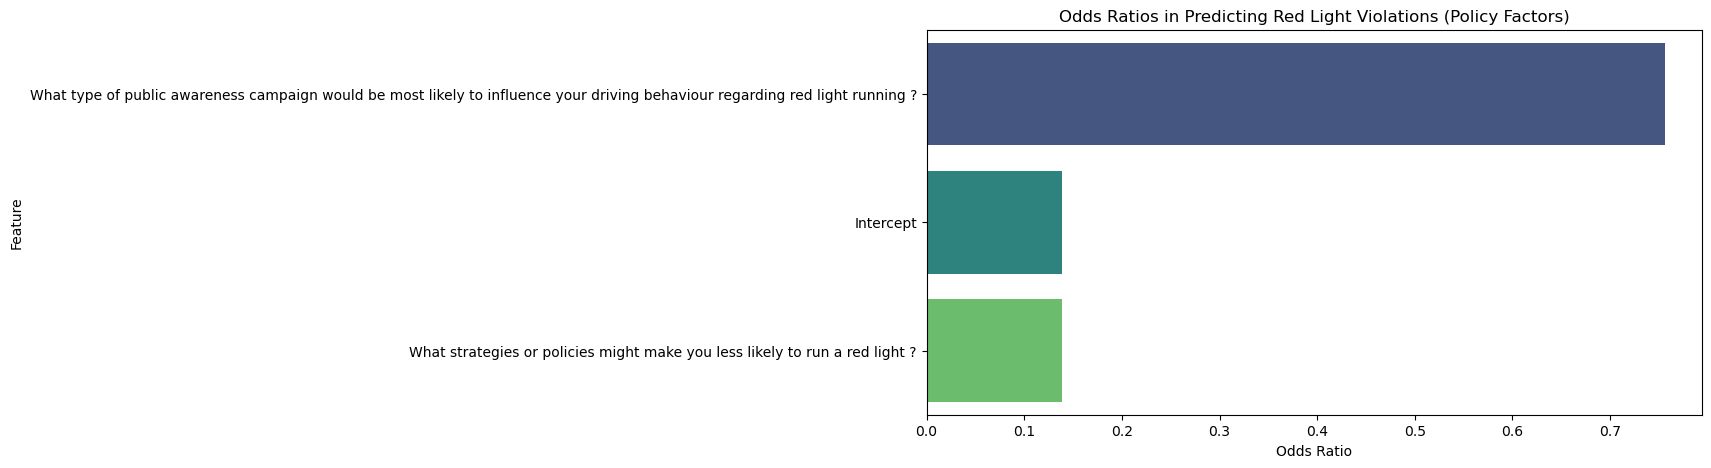

In [12]:
# Visualization of odds ratios
plt.figure(figsize=(10, 5))
sns.barplot(x=importance_df_pol["Odds_Ratio"], y=importance_df_pol["Feature"], palette="viridis")
plt.xlabel("Odds Ratio")
plt.ylabel("Feature")
plt.title("Odds Ratios in Predicting Red Light Violations (Policy Factors)")
plt.show()

In [11]:
# Get feature importance (coefficients) and calculate odds ratios
coefficients_pol = log_reg_pol.coef_[0]
odds_ratios_pol = np.exp(coefficients_pol)

In [12]:
# Create a DataFrame to display feature importance and odds ratios
importance_df_pol = pd.DataFrame(
    {"Feature": X_policy.columns, "Coefficient": coefficients_pol, "Odds_Ratio": odds_ratios_pol}
).sort_values(by="Odds_Ratio", ascending=False)


In [13]:
# Print feature importance and odds ratios
print("Feature Importance and Odds Ratios:")
print(importance_df_pol)


Feature Importance and Odds Ratios:
                                             Feature  Coefficient  Odds_Ratio
1  What type of public awareness campaign would b...    -0.264361    0.767696
0  What strategies or policies might make you les...    -1.892260    0.150731


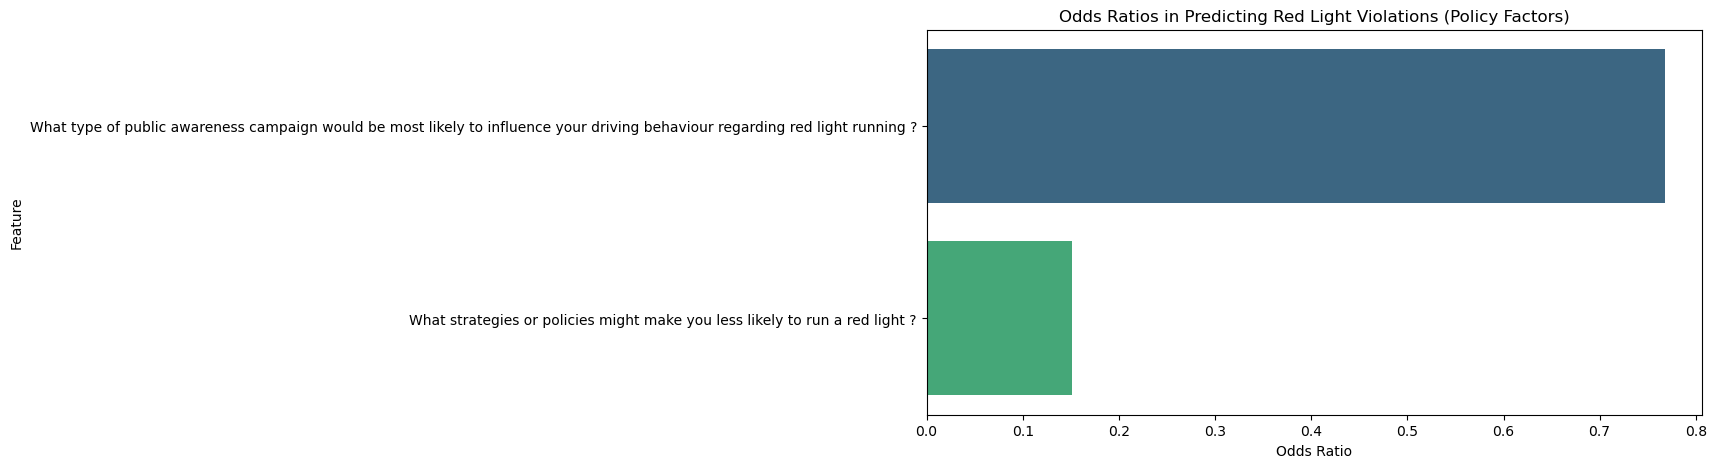

In [14]:
# Visualization of odds ratios
plt.figure(figsize=(10, 5))
sns.barplot(x=importance_df_pol["Odds_Ratio"], y=importance_df_pol["Feature"], palette="viridis")
plt.xlabel("Odds Ratio")
plt.ylabel("Feature")
plt.title("Odds Ratios in Predicting Red Light Violations (Policy Factors)")
plt.show()